See

* https://twitter.com/OPPO89694572/status/1399910007777349633
* https://twitter.com/OPPO89694572/status/1399721433127923722

In [1]:
using LinearAlgebra
using Plots
using Printf

In [2]:
"""
`Laplacian(N)` is the 1D discrete Laplacian
with left Dirichlet and right Neumann boundary conditions.

The 1D Poisson equation
\$u''(x) = f(x)\$, 
\$u(a) = \\alpha\$,
\$u'(b) = \\beta\$
is approximated by \$h^2(A u + b) = v\$,
where
\$x = \\mathrm{range}(a, b; \\mathrm{length}=N+1)\$,
\$h = \\mathrm{step}(x)\$,
\$A = \\mathrm{Laplacian}(N)\$, 
\$b = \\mathrm{BC}(N, h, \\alpha, \\beta)\$, 
and
\$v = f.(x[2{:}\\mathrm{end}])\$.

__Remark.__ Laplacian(N) × (-1) is equal to the Cartan matrix of B-type (or C-type).
"""
Laplacian(N) = Tridiagonal(
    [fill(1, N-2); 2],
    [fill(-2, N-1); -2],
    fill(1, N-1)
)

BC(N, h, α, β) = [α; zeros(N-2); 2β*h]

BC (generic function with 1 method)

In [3]:
?Laplacian

search: Laplacian



`Laplacian(N)` is the 1D discrete Laplacian with left Dirichlet and right Neumann boundary conditions.

The 1D Poisson equation $u''(x) = f(x)$,  $u(a) = \alpha$, $u'(b) = \beta$ is approximated by $h^2(A u + b) = v$, where $x = \mathrm{range}(a, b; \mathrm{length}=N+1)$, $h = \mathrm{step}(x)$, $A = \mathrm{Laplacian}(N)$,  $b = \mathrm{BC}(N, h, \alpha, \beta)$,  and $v = f.(x[2{:}\mathrm{end}])$.

**Remark.** Laplacian(N) × (-1) is equal to the Cartan matrix of B-type (or C-type).


In [4]:
Laplacian(8)

8×8 Tridiagonal{Int64, Vector{Int64}}:
 -2   1   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅
  1  -2   1   ⋅   ⋅   ⋅   ⋅   ⋅
  ⋅   1  -2   1   ⋅   ⋅   ⋅   ⋅
  ⋅   ⋅   1  -2   1   ⋅   ⋅   ⋅
  ⋅   ⋅   ⋅   1  -2   1   ⋅   ⋅
  ⋅   ⋅   ⋅   ⋅   1  -2   1   ⋅
  ⋅   ⋅   ⋅   ⋅   ⋅   1  -2   1
  ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   2  -2

In [5]:
"""
`solve_1d_poisson(param)` solves the discrete version of the 1D Poisson equation
\$u''(x) = f(x)\$, \$u(a) = \\alpha\$, \$u'(b) = \\beta\$,
where `param = (a, b, α, β, f, N)`
"""
function solve_1d_poisson(param)
    a, b, α, β, f, N = param
    x = range(a, b; length=N+1)
    h = step(x)
    A = Laplacian(N)
    b = BC(N, h, α, β)
    v = f.(x[2:end])
    u = [α; A\(h^2*v - b)] # solve h⁻²(A + b)u = v
    (; x, u, param)
end

solve_1d_poisson

In [6]:
?solve_1d_poisson

search: solve_1d_poisson



`solve_1d_poisson(param)` solves the discrete version of the 1D Poisson equation $u''(x) = f(x)$, $u(a) = \alpha$, $u'(b) = \beta$, where `param = (a, b, α, β, f, N)`


In [7]:
"""
`plot_1d_poisson(sol, u_exact)` plots the numerical solution `sol` and the exact solution function `u_exact`.
"""
function plot_1d_poisson(sol, u_exact)
    x, u, param = sol
    a, b, α, β, f, N = param
    xs = range(a, b; length=1001)
    
    P = plot(x, u; label="numerical")
    isnothing(u_exact) || plot!(xs, u_exact.(Ref(param), xs); label="exact", ls=:dash)
    title_str = @sprintf("u(%.2f) = %.2f,  u'(%.2f) = %.2f,  N = %d", a, α, b, β, N) 
    title!(title_str; titlefontsize=10)
    
    fs = f.(xs)
    ylim = extrema(fs)
    ydiff = ylim[2] - ylim[1]
    ylim =  (ylim[1] - 0.1(ydiff + 1), ylim[2] + 0.1(ydiff + 1))
    Q = plot(xs, fs; label="y = f(x)", ylim)
    title!("u''(x) = f(x)"; titlefontsize=10)
    
    plot(P, Q; size=(800, 300))
end

plot_1d_poisson

In [8]:
?plot_1d_poisson

search: plot_1d_poisson



`plot_1d_poisson(sol, u_exact)` plots the numerical solution `sol` and the exact solution function `u_exact`.


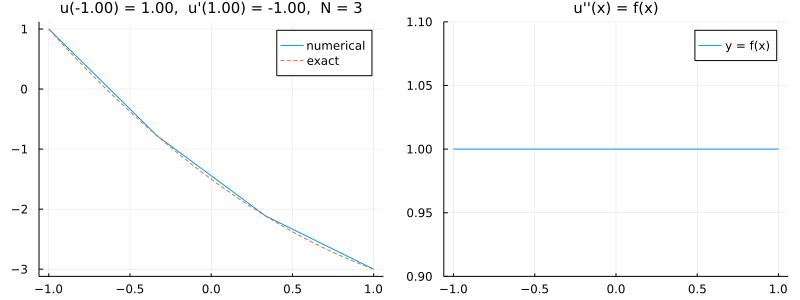

In [9]:
param1a = (
    a = -1.0,
    b = 1.0,
    α = 1.0,
    β = -1.0,
    f = x -> 1.0,
    N = 3,
)

"""Assume f is a constant function.""" 
function u1_exact(param, x)
    a, b, α, β, f, N = param
    c = f(0.0)
    (c/2)x^2 + (-c*b + β)x - (c/2)a^2 - (-c*b + β)a + α
end

sol1a = solve_1d_poisson(param1a)
plot_1d_poisson(sol1a, u1_exact)

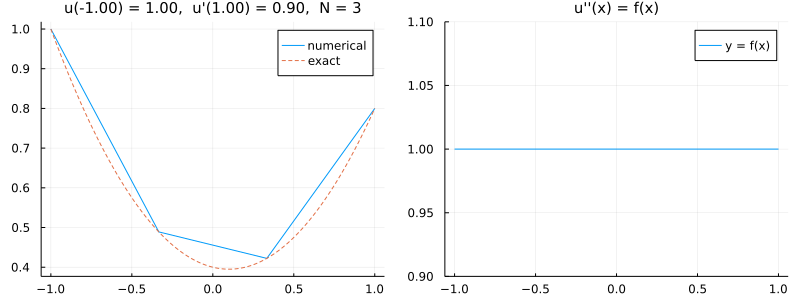

In [10]:
param1b = (
    a = -1.0,
    b = 1.0,
    α = 1.0,
    β = 0.9,
    f = x -> 1.0,
    N = 3,
)

sol1b = solve_1d_poisson(param1b)
plot_1d_poisson(sol1b, u1_exact)

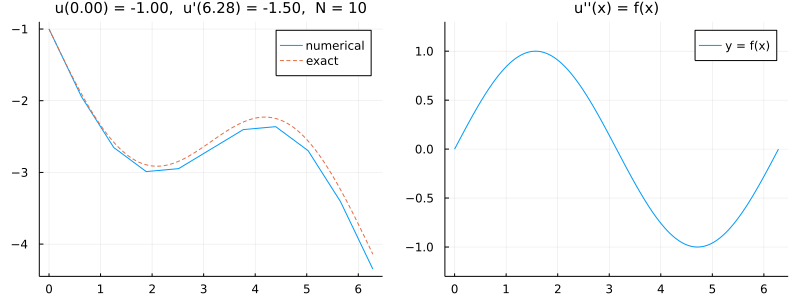

In [11]:
param2 = (
    a = 0.0,
    b = 2π,
    α = -1.0,
    β = -1.5,
    f = sin,
    N = 10,
)

"""Assume a = 0,  b = 2π,  f = sin"""
function u2_exact(param, x)
    a, b, α, β, f, N = param
    α + (β + 1)x - sin(x)
end

sol2 = solve_1d_poisson(param2)
plot_1d_poisson(sol2, u2_exact)